### Why Groupby?

Pandas is widely used Python library for data analytics projects. However, it is never easy to analyze the data as it is to get valuable insights from it. To understand the data better, you need to transform and aggregate it. And that’s when groupby comes into the picture.

In Pandas, groupby essentially splits all the records from your dataset into different categories or groups and offers you flexibility to analyze the data by these groups.

It is extremely efficient and must know function in data analysis, which gives you interesting insights within few seconds. And that’s why it is usually asked in data science job interviews. Therefore, it is important to master it.

It’s a simple concept but it’s an extremely valuable technique that’s widely used in data science. In real data science projects, you’ll be dealing with large amounts of data and trying things over and over, so for efficiency, we use Groupby concept. Groupby concept is really important because it’s ability to aggregate data efficiently, both in performance and the amount code is magnificent. 

### Group by in details!
- Syntax
    DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)  

- Groupby mainly refers to a process involving one or more of the following steps they are:<br> 
    - *Splitting* : It is a process in which we split data into group by applying some conditions on datasets.<br> 
    - *Applying*  : It is a process in which we apply a function to each group independently<br> 
    - *Combining* : It is a process in which we combine different datasets after applying groupby and results into                     a data structure<br> 
***Note: The result of Groupby operation is not a DataFrame, but dict of DataFrame objects.*** (Interview)*



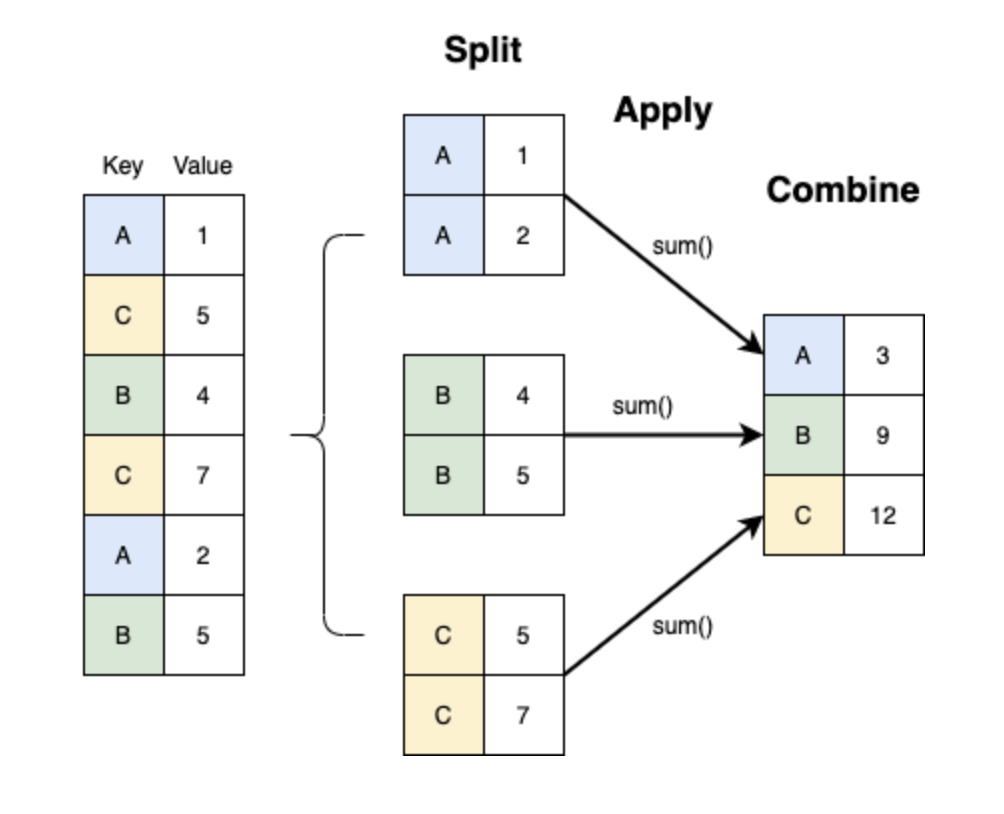

 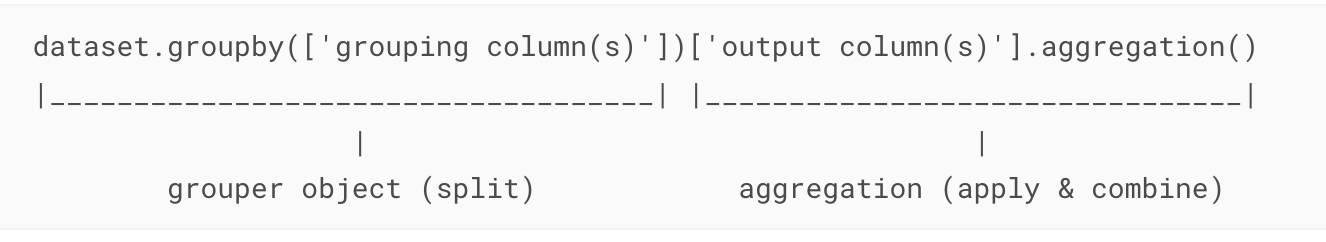

In [1]:
#slit (index side (left side)) & aggregation ()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic_data.csv")

print(df.shape)
df.head()

(889, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### The descriptions of each column in the dataset:

Survived: Whether the passenger survived or not (0 = No, 1 = Yes).<br>
Pclass: The passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).<br>
Name: The passenger's name.<br>
Sex: The passenger's sex (Male or Female).<br>
Age: The passenger's age in years (some entries contain NaN).<br>
SibSp: The number of siblings/spouses the passenger had aboard the Titanic.<br>
Parch: The number of parents/children the passenger had aboard the Titanic.<br>
Ticket: The passenger's ticket number.<br>
Fare: The fare paid by the passenger.<br>
Cabin: The passenger's cabin number (some entries contain NaN).<br>
Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).embark = to begin (a journey) <br>
<br>
Note that the Survived, Pclass, Sex, and Embarked columns contain categorical data, while the rest of the columns contain numerical data. Also note that some of the columns contain missing values (NaN)

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
#dropping missing values
df.dropna(inplace=True)

# 1 - Basic groupby

dataset.groupby(['grouping column(s)'])['output column(s)'].aggregation()


In [6]:
df.groupby(df['class']).first()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False
Second,1,2,male,34.0,0,0,13.0000,S,man,True,D,Southampton,yes,True
Third,1,3,female,4.0,1,1,16.7000,S,child,False,G,Southampton,yes,False


#index side(left side)

### 1) Question: What is the total number of passengers from each class who survived?


In [8]:
#each class
grouper_class = df.groupby(df['class'])
print(grouper_class)

When you execute print(grouper_class) after grouping the DataFrame by class, it returns a DataFrameGroupBy object and its memory location. This is not very informative as it does not show the actual data.

To see the output of the grouped data, you can apply an aggregation function, such as count(), mean(), or sum() to the grouped object.

In [9]:
grouper_class['survived'].sum()

class
First     106
Second     12
Third       5
Name: survived, dtype: int64

In [10]:
df.groupby(df['class'])['survived'].sum()

class
First     106
Second     12
Third       5
Name: survived, dtype: int64

In [11]:
grouper_class['survived'].sum().reset_index()

,class,survived
0,First,106
1,Second,12
2,Third,5


reset_index() is a method in pandas that resets the index of a DataFrame or Series object. It is commonly used after performing groupby operations or filtering operations that result in a new DataFrame or Series with a modified index.

In [12]:
df['class'].value_counts()

First     157
Second     15
Third      10
Name: class, dtype: int64

In [13]:
df['survived'].value_counts()

1    123
0     59
Name: survived, dtype: int64

In [14]:
106+12+5

123

Now question in your mind is that, how it calculating only 1(survived)?

When you sum the survived column in each group, you are effectively counting the number of survivors in each group because the survived column only contains 1s and 0s, where 1 indicates that the passenger survived and 0 indicates that the passenger did not survive.

Therefore, the sum of survived in each group is equal to the number of passengers who survived in that group

so means because of sum we got 0+1 = 1 and thats why he is giving only survived at output

### 2)Question: What was the average fare for passengers from each town?

In [15]:
#each - town
#fare - agg average = mean

df.groupby(['embark_town'])['fare'].mean().reset_index()

,embark_town,fare
0,Cherbourg,103.342503
1,Queenstown,90.000000
2,Southampton,64.922862


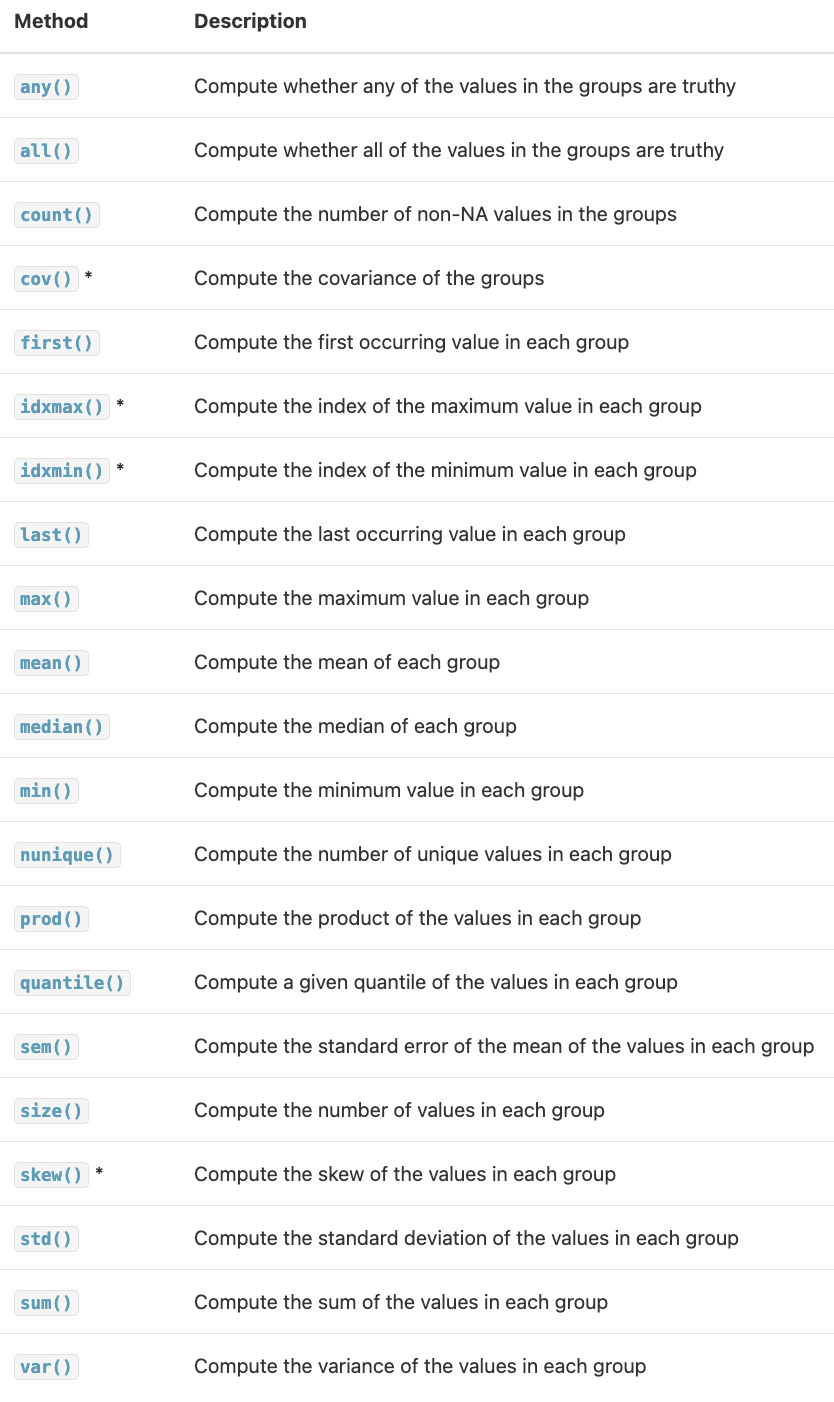

### 3) How many persons are alive from each who group?


In [16]:
#each - who
df.groupby('who')['alive'].sum()

who
child                yesyesyesnonoyesyesyesyesyesyesyesyes
man      noyesyesnonononononoyesnononononononononoyesye...
woman    yesyesyesyesyesyesyesyesyesnoyesyesyesyesyesno...
Name: alive, dtype: object

In [17]:
df['alive'].value_counts()

yes    123
no      59
Name: alive, dtype: int64

In [18]:
df['alive_'] = [(0 if x=='no' else 1) for x in df['alive']]

In [20]:
df[['alive', 'alive_']]

,alive,alive_
1,yes,1
3,yes,1
6,no,0
10,yes,1
11,yes,1
...,...,...
869,yes,1
870,no,0
877,yes,1
885,yes,1


In [21]:
df.groupby('who')['alive_'].sum()

who
child    11
man      34
woman    78
Name: alive_, dtype: int64

In [22]:
11+34+78

123

In [23]:
df.alive_.value_counts()

1    123
0     59
Name: alive_, dtype: int64

In [24]:
df['alive_'].value_counts()

1    123
0     59
Name: alive_, dtype: int64

# ---------------------------------------------------------------------

# 2 - Adding more groups

### 1) What was the average fare for male vs female passengers from each town?


In [25]:
#each - town , sex
#average - fare

df.groupby(['embark_town', 'sex'])['fare'].mean().reset_index()

,embark_town,sex,fare
0,Cherbourg,female,104.169609
1,Cherbourg,male,102.435355
2,Queenstown,female,90.000000
3,Queenstown,male,90.000000
4,Southampton,female,79.251179
5,Southampton,male,52.674461


In [26]:
df.groupby(['embark_town', 'sex'])['age'].mean().reset_index()

,embark_town,sex,age
0,Cherbourg,female,35.352941
1,Cherbourg,male,39.774194
2,Queenstown,female,33.000000
3,Queenstown,male,44.000000
4,Southampton,female,30.952830
5,Southampton,male,37.595484


# ----------------------------------------------------

# 3 - Adding more variables/features for aggregations

In [27]:
df.groupby(['embark_town', 'sex'])[['age','fare']].mean().reset_index()

,embark_town,sex,age,fare
0,Cherbourg,female,35.352941,104.169609
1,Cherbourg,male,39.774194,102.435355
2,Queenstown,female,33.000000,90.000000
3,Queenstown,male,44.000000,90.000000
4,Southampton,female,30.952830,79.251179
5,Southampton,male,37.595484,52.674461


# 4 - Grouping

In [28]:
df.groupby('embark_town').first()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,alive_
embark_town,,,,,,,,,,,,,,,
Cherbourg,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,1
Queenstown,0,1,male,44.0,2,0,90.0000,Q,First,man,True,C,no,False,0
Southampton,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,1


In [29]:
grouper = df.groupby('embark_town')

#k-key, g-group

#print dtype for each element in grouper
[(type(k), type(g)) for k,g in grouper]

[(str, pandas.core.frame.DataFrame),
 (str, pandas.core.frame.DataFrame),
 (str, pandas.core.frame.DataFrame)]

For each group in 'grouper', the list comprehension creates a tuple containing the data type of the key and the value for that group.

The 'k' variable in the for loop represents the key for the current group, and the 'g' variable represents the value for that group.

Here, str--> embark_town, and all other are represent as a dataframe.

So, this shows that if we try to iterate over the grouper object, its nothing but a tuple with the key and a dataframe.

Let's see what each of those is.

In [30]:
[(k, g.shape) for k,g in grouper] #value couts,  16 columns

[('Cherbourg', (65, 16)), ('Queenstown', (2, 16)), ('Southampton', (115, 16))]

In [31]:
df.shape

(182, 16)

In [32]:
df['embark_town'].value_counts()

Southampton    115
Cherbourg       65
Queenstown       2
Name: embark_town, dtype: int64

In [33]:
grouper = df.groupby(['embark_town', 'sex'])
[(k, g.shape) for k,g in grouper] #value couts,  16 columns

[(('Cherbourg', 'female'), (34, 16)),
 (('Cherbourg', 'male'), (31, 16)),
 (('Queenstown', 'female'), (1, 16)),
 (('Queenstown', 'male'), (1, 16)),
 (('Southampton', 'female'), (53, 16)),
 (('Southampton', 'male'), (62, 16))]

In [34]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

In [35]:
31+1+62

94

In [36]:
df.groupby(['embark_town', 'sex'])['age'].mean()


embark_town  sex   
Cherbourg    female    35.352941
             male      39.774194
Queenstown   female    33.000000
             male      44.000000
Southampton  female    30.952830
             male      37.595484
Name: age, dtype: float64

In [37]:
df.groupby(['embark_town', 'sex'])['sex'].count()


embark_town  sex   
Cherbourg    female    34
             male      31
Queenstown   female     1
             male       1
Southampton  female    53
             male      62
Name: sex, dtype: int64

# 4 - Aggregation

pandas inbuilt

Custom agg --> .apply(), lambda

### Question: Get the unique set of ages for all each age category (who column) from each town.

In [38]:
#each - town
#each age category - gender
#unique set of ages 

df.groupby(['embark_town','who'])['age'].apply(set).reset_index()

,embark_town,who,age
0,Cherbourg,man,"{17.0, 18.0, 23.0, 24.0, 25.0, 26.0, 27.0, 30...."
1,Cherbourg,woman,"{16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24...."
2,Queenstown,man,{44.0}
3,Queenstown,woman,{33.0}
4,Southampton,child,"{0.92, 1.0, 2.0, 3.0, 4.0, 6.0, 11.0, 14.0, 15.0}"
5,Southampton,man,"{19.0, 21.0, 25.0, 27.0, 28.0, 29.0, 31.0, 32...."
6,Southampton,woman,"{16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24...."


### Question: Get the range (min - max) of ages for each age category (who column) from each town.

In [39]:
df.groupby(['embark_town','who'])['age'].apply(lambda x: x.max()-x.min()).reset_index()

,embark_town,who,age
0,Cherbourg,man,54.00
1,Cherbourg,woman,44.00
2,Queenstown,man,0.00
3,Queenstown,woman,0.00
4,Southampton,child,14.08
5,Southampton,man,61.00
6,Southampton,woman,47.00


# 5- Multiple aggregation using agg method

The general way to do this is to create a dictionary with the requirements and pass it to the agg() function. There are a few ways to structure the dictionary -

    Single function per column
    {
     'column1': 'function1', 
     'column2': 'function2'
    }

    Multiple functions per column
    {
     'column1': ['function1', 'function2'], 
     'column2': ['function3', 'function4']
    }

### Question: Get the mean of fare, AND median of age for each age category (who column) from each town

In [40]:
#define agg func as a dictionary
multiple_agg = {
                'fare':'mean',
                'age':'median'
                }
df.groupby(['embark_town','who']).agg(multiple_agg).reset_index()

,embark_town,who,fare,age
0,Cherbourg,man,102.435355,36.0
1,Cherbourg,woman,104.169609,37.0
2,Queenstown,man,90.000000,44.0
3,Queenstown,woman,90.000000,33.0
4,Southampton,child,77.379485,4.0
5,Southampton,man,51.071515,40.0
6,Southampton,woman,77.686436,33.0


### Question: Get the sum & mean of fare, AND median, min and max of age for each age category (who column) from each town

In [41]:
# fare - sum, mean
# age - min,max,median

multiple_agg ={
                'fare':['sum', 'mean'],
                'age':['min', 'max', 'median']
}

df.groupby(['embark_town','who']).agg(multiple_agg).reset_index()

embark_town    who       fare                age             
                             sum        mean    min   max median
0    Cherbourg    man  3175.4960  102.435355  17.00  71.0   36.0
1    Cherbourg  woman  3541.7667  104.169609  16.00  60.0   37.0
2   Queenstown    man    90.0000   90.000000  44.00  44.0   44.0
3   Queenstown  woman    90.0000   90.000000  33.00  33.0   33.0
4  Southampton  child  1005.9333   77.379485   0.92  15.0    4.0
5  Southampton    man  2808.9333   51.071515  19.00  80.0   40.0
6  Southampton  woman  3651.2625   77.686436  16.00  63.0   33.0

# 6 - Custom functions with agg method

In [42]:
custom_agg = {
            'fare': lambda x: x.sum(),
            'age': lambda x: x.max()
}

df.groupby(['embark_town','who']).agg(custom_agg).reset_index()

,embark_town,who,fare,age
0,Cherbourg,man,3175.4960,71.0
1,Cherbourg,woman,3541.7667,60.0
2,Queenstown,man,90.0000,44.0
3,Queenstown,woman,90.0000,33.0
4,Southampton,child,1005.9333,15.0
5,Southampton,man,2808.9333,80.0
6,Southampton,woman,3651.2625,63.0
